In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('/Users/Jingsi/Desktop/A_Wiley/Predictive_Model/multi_regression/youtube_trend_new.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
data.head(3)

,microstructure,adhesion,scaffold,tissue engineering,polymer,regeneration,nanoparticles,hydrogel,chitosan,bone
Date,,,,,,,,,,
2008-01-01,0,54,0,0,0,0,0,0,0,19
2008-02-01,0,0,0,0,39,0,45,0,0,21
2008-03-01,0,0,0,0,0,47,40,0,0,23


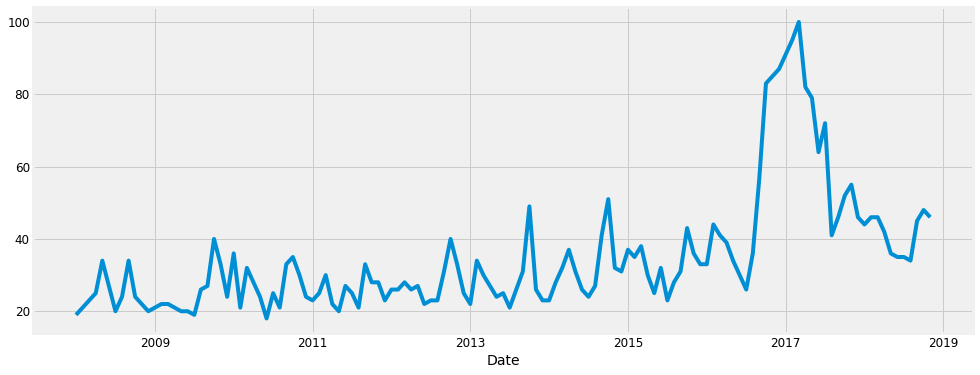

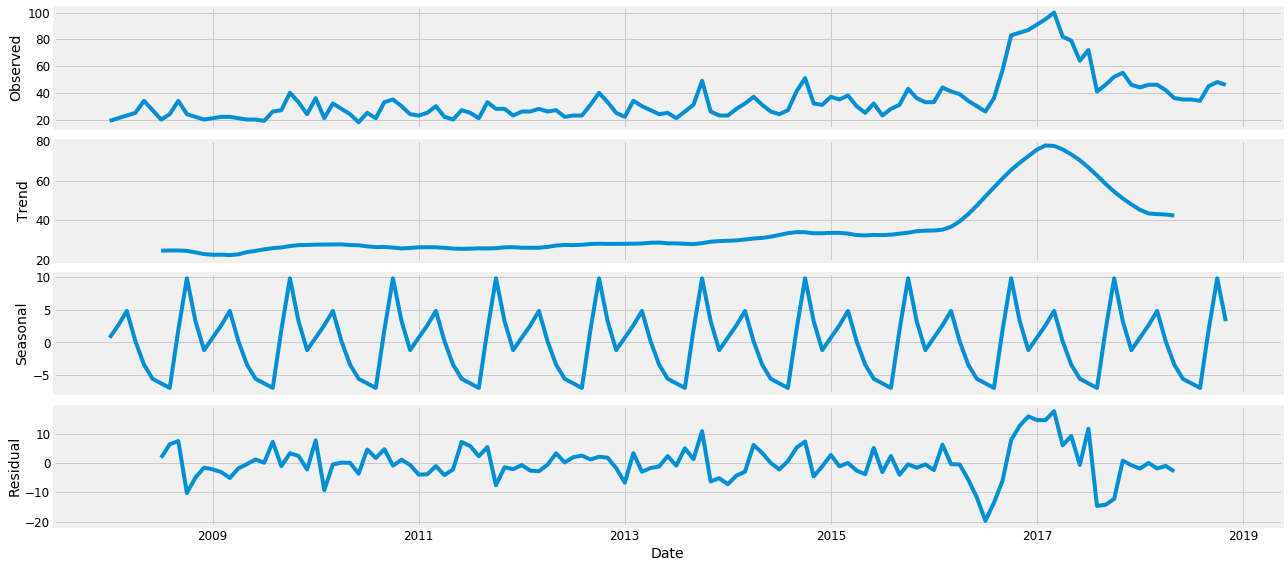

In [2]:
y=data['bone']
y.plot(figsize=(15, 6))
plt.show()

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [3]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1320.4061401085823
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1129.44525429371
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1037.4248651908733
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:909.1482306594892
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1043.4957230996806
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:982.6490712377927
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:914.2693767219025
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:907.2449304234376
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1179.5635188165245
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1016.6411419812998
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:955.6612483591873
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:831.9240598878249
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:965.9978703730854
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:907.9217061602693
ARIMA(0, 0, 1)x(1, 1, 0, 12)1

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8558      0.168     -5.092      0.000      -1.185      -0.526
ma.L1          0.6853      0.211      3.242      0.001       0.271       1.100
ar.S.L12      -0.0075      0.009     -0.852      0.394      -0.025       0.010
ma.S.L12      -0.8840      0.176     -5.020      0.000      -1.229      -0.539
sigma2        43.8291      6.919      6.334      0.000      30.268      57.391


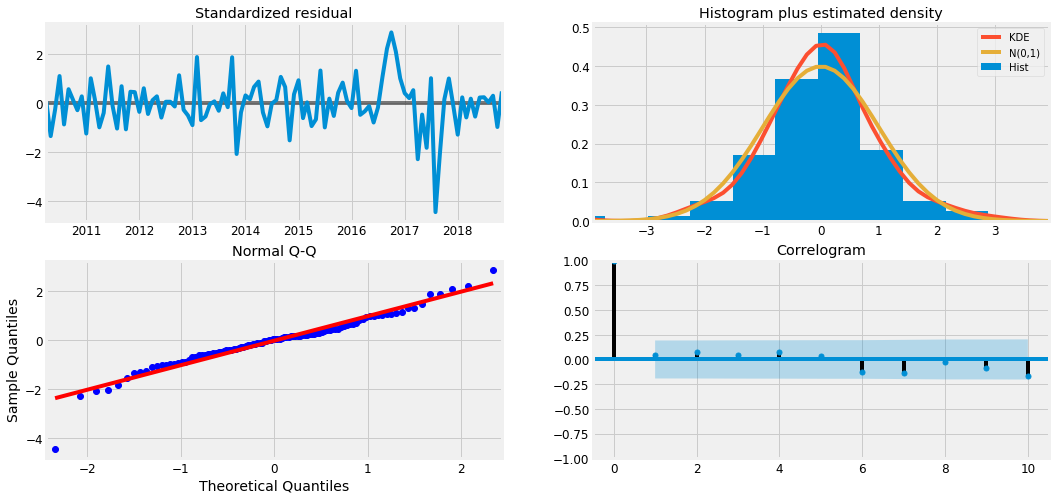

In [4]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

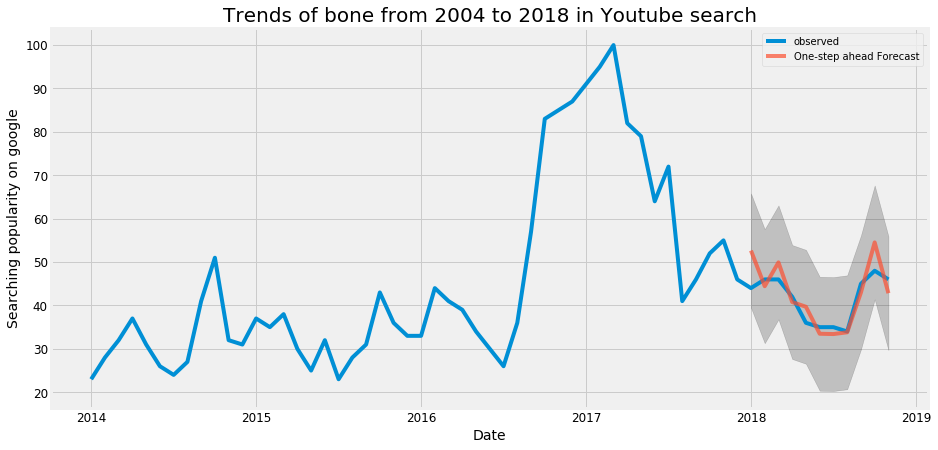

The Mean Squared Error of our forecasts is 15.4
The Root Mean Squared Error of our forecasts is 3.92


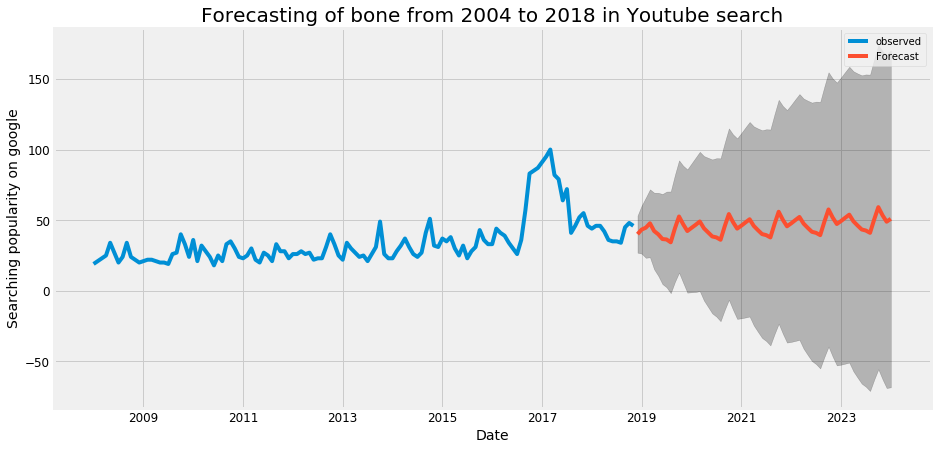

In [5]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Searching popularity on google')
plt.title("Trends of bone from 2004 to 2018 in Youtube search",fontsize=20)
plt.legend()
plt.show()

y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

pred_uc = results.get_forecast(steps=62)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Searching popularity on google')
plt.title("Forecasting of bone from 2004 to 2018 in Youtube search",fontsize=20)
plt.legend()
plt.show()